<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 155.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 145.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 103.1 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


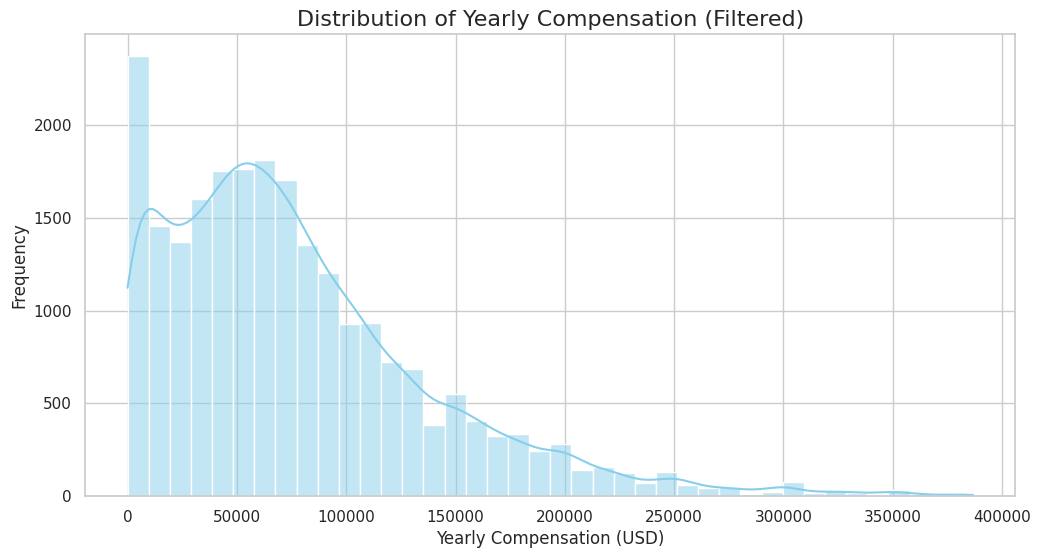

In [3]:
## Write your code here
# Drop missing values in the 'ConvertedCompYearly' column
comp_data = df['ConvertedCompYearly'].dropna()

# Optional: Remove extreme outliers for better visualization
# We'll filter out compensation values above the 99th percentile
comp_data_filtered = comp_data[comp_data < comp_data.quantile(0.99)]

# Set the style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Plot histogram with KDE
sns.histplot(comp_data_filtered, bins=40, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Yearly Compensation (Filtered)', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here

# Filter for full-time employed respondents
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Drop missing compensation values
full_time_comp = full_time_df['ConvertedCompYearly'].dropna()

# Calculate median
median_full_time_comp = full_time_comp.median()

# Display the result
print(f"The median yearly compensation for full-time employees is: ${median_full_time_comp:,.2f}")


The median yearly compensation for full-time employees is: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



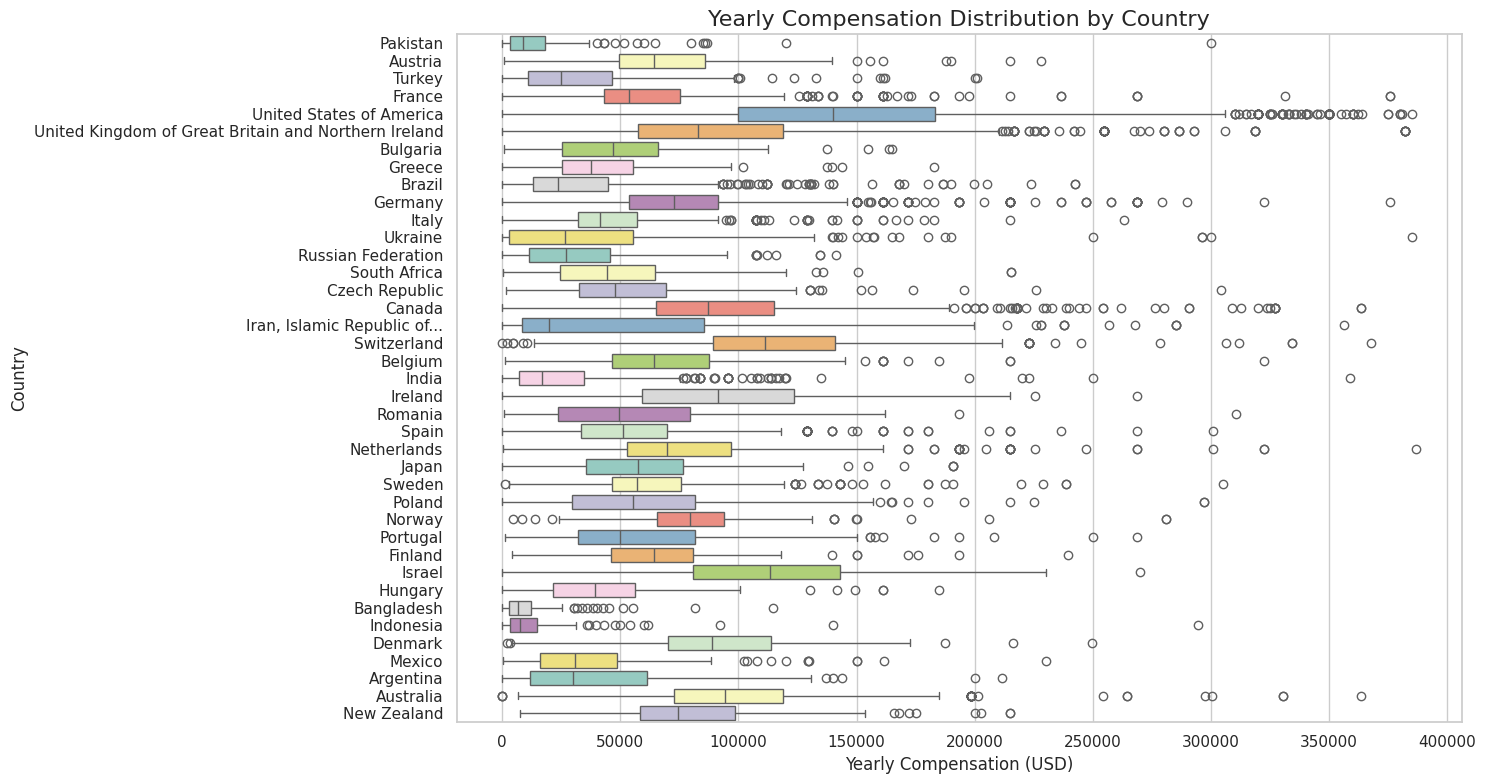

In [7]:
plt.figure(figsize=(15, 8))

# Fix: set hue='Country' and legend=False to comply with future versions
sns.boxplot(
    data=country_comp_df,
    x='ConvertedCompYearly',
    y='Country',
    hue='Country',
    palette='Set3',
    legend=False
)

# Title and labels
plt.title('Yearly Compensation Distribution by Country', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [8]:
## Write your code here
# Create a copy of the dataset to work with
refined_df = df.copy()

# Drop rows with missing compensation values
refined_df = refined_df.dropna(subset=['ConvertedCompYearly'])

# Calculate IQR (Interquartile Range)
Q1 = refined_df['ConvertedCompYearly'].quantile(0.25)
Q3 = refined_df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
refined_df = refined_df[
    (refined_df['ConvertedCompYearly'] >= lower_bound) &
    (refined_df['ConvertedCompYearly'] <= upper_bound)
]

# Check shape or head of refined dataset
print(f"Refined dataset shape: {refined_df.shape}")
refined_df[['ConvertedCompYearly']].describe()


Refined dataset shape: (22457, 114)


,ConvertedCompYearly
count,22457.000000
mean,71347.201897
std,51271.396445
min,1.000000
25%,32000.000000
50%,63694.000000
75%,101281.000000
max,220207.000000


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


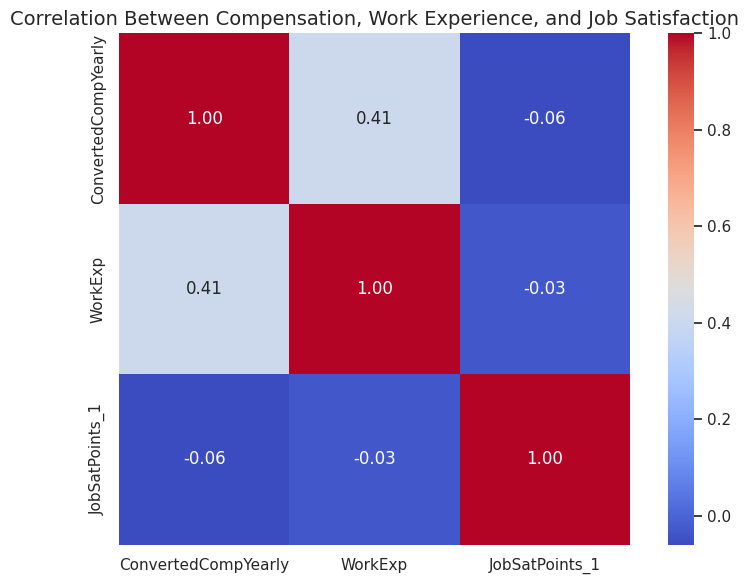

In [9]:
## Write your code here
# First, select the columns of interest
correlation_df = refined_df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].copy()

# Drop rows with missing values in any of these columns
correlation_df = correlation_df.dropna()

# Ensure numeric data types (especially important if WorkExp is stored as string)
correlation_df['WorkExp'] = pd.to_numeric(correlation_df['WorkExp'], errors='coerce')
correlation_df['JobSatPoints_1'] = pd.to_numeric(correlation_df['JobSatPoints_1'], errors='coerce')
correlation_df = correlation_df.dropna()

# Compute the correlation matrix
corr_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title
plt.title('Correlation Between Compensation, Work Experience, and Job Satisfaction', fontsize=14)
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


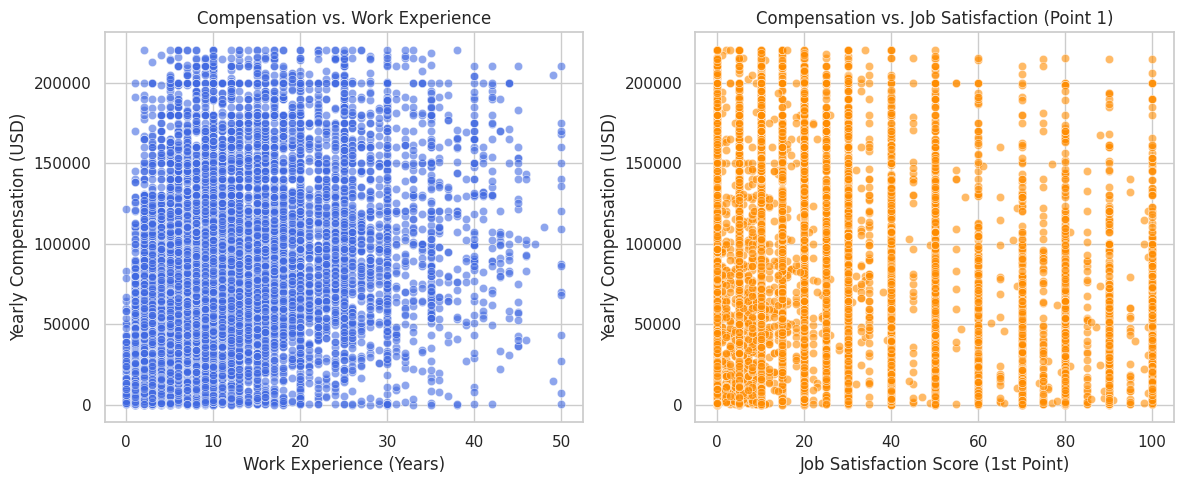

In [10]:
## Write your code here
# Set the style
sns.set(style="whitegrid")

# Scatter plot: Compensation vs Work Experience
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=correlation_df,
    x='WorkExp',
    y='ConvertedCompYearly',
    alpha=0.6,
    color='royalblue'
)
plt.title('Compensation vs. Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')

# Scatter plot: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=correlation_df,
    x='JobSatPoints_1',
    y='ConvertedCompYearly',
    alpha=0.6,
    color='darkorange'
)
plt.title('Compensation vs. Job Satisfaction (Point 1)')
plt.xlabel('Job Satisfaction Score (1st Point)')
plt.ylabel('Yearly Compensation (USD)')

plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
